# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [24]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

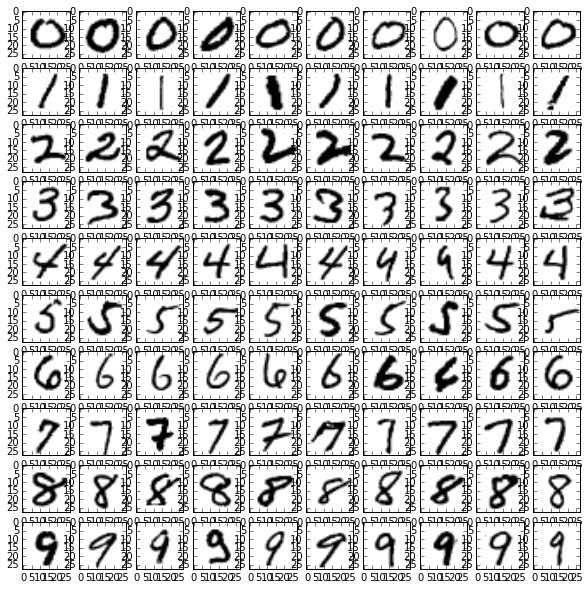

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    #start by identifying 10 examples of each digit
    zeroes = np.argwhere(mini_train_labels==0.)[0:10]
    ones = np.argwhere(mini_train_labels==1.)[0:10]
    twos = np.argwhere(mini_train_labels==2.)[0:10]
    threes = np.argwhere(mini_train_labels==3.)[0:10]
    fours = np.argwhere(mini_train_labels==4.)[0:10]
    fives = np.argwhere(mini_train_labels==5.)[0:10]
    sixes = np.argwhere(mini_train_labels==6.)[0:10]
    sevens = np.argwhere(mini_train_labels==7.)[0:10]
    eights = np.argwhere(mini_train_labels==8.)[0:10]
    nines = np.argwhere(mini_train_labels==9.)[0:10]
    digits = np.concatenate((zeroes, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
    
    #then move to plot 10 of each digit
    fig = plt.figure(figsize=(10,10))
    for i in range(1,101):
        plt.subplot(10,10,i)
        plt.imshow(mini_train_data[digits[i-1]].reshape((28,28)), cmap=plt.cm.binary)
    
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

In [4]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(mini_train_data, mini_train_labels)
        dev_predictions = model.predict(dev_data)
        dev_results_incorrect = (dev_predictions != dev_labels)
        dev_results_correct = (dev_predictions == dev_labels)
        print 'results for k=', i
        print '# of incorrect predictions:', np.sum(dev_results_incorrect)
        print '# of correct predictions:', np.sum(dev_results_correct)
        print classification_report(dev_labels, dev_predictions, 
                                target_names=['0','1','2','3','4','5','6','7','8','9'])  
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

results for k= 1
# of incorrect predictions: 112
# of correct predictions: 888
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

results for k= 3
# of incorrect predictions: 122
# of correct predictions: 878
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        99
          1       0.81      1.00      0.89       105
          2       0.95      0.81      0.88 

ANSWER:

For k=1, the most difficult digit to predict is 2 with a recall of only 0.79 meaning it only found 79% of the actual samples (true positive and false negative). The digit 3 had the worst precision, meaning the model predicted a higher ratio for false positives than the other digits. 

results for k= 1

number of incorrect predictions: 112

number of correct predictions: 888

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

    avg/total     0.89      0.89      0.89      1000

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

In [37]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for i in train_sizes:
        model = KNeighborsClassifier(n_neighbors=1)
        start_time = time.time()
        model.fit(train_data[0:i], train_labels[0:i])
        dev_pred = model.predict(dev_data)
        end_time = time.time()
        accuracies.append(model.score(dev_data,dev_labels))
        print 'train size:',i,'needed this much time:', round(end_time-start_time,3)
    for num in range(len(accuracies)):
        print 'accuracy when train_size is',train_sizes[num], '=', accuracies[num]
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

train size: 100 needed this much time: 0.171
train size: 200 needed this much time: 0.322
train size: 400 needed this much time: 0.814
train size: 800 needed this much time: 1.833
train size: 1600 needed this much time: 3.607
train size: 3200 needed this much time: 6.546
train size: 6400 needed this much time: 13.482
train size: 12800 needed this much time: 28.406
train size: 25000 needed this much time: 60.941
accuracy when train_size is 100 = 0.72
accuracy when train_size is 200 = 0.786
accuracy when train_size is 400 = 0.841
accuracy when train_size is 800 = 0.884
accuracy when train_size is 1600 = 0.902
accuracy when train_size is 3200 = 0.926
accuracy when train_size is 6400 = 0.937
accuracy when train_size is 12800 = 0.959
accuracy when train_size is 25000 = 0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

[ 1.24307226]


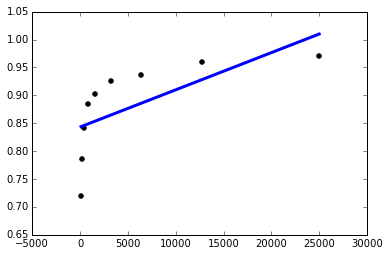

In [36]:
def P4():

### STUDENT START ###
    #first need to reshapre train_sizes and accuracies to vectors for LinReg in sklearn
    ts = np.reshape(train_sizes, (len(train_sizes),1))
    acc = np.reshape(accuracies, (len(accuracies),1))
    lr = LinearRegression()
    lr.fit(ts, acc)
    plt.scatter(train_sizes, accuracies, color='black')
    plt.plot(train_sizes, lr.predict(ts), color='blue', linewidth=3)
    print lr.predict([60000])
### STUDENT END ###

P4()

ANSWER: The Linear Regression model predicts an accuracy of 124% for n=60000. Since accuracy cannot exceed 1.0, the Linear Regression model will yield impossible results and generally be a poor fit for really big training sizes. By plotting the data points, we can see that the shape looks like a log function so using a log transformation would probably result in a better predictive model. 

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Confusion Matrix for 1-NN: Expected vs. Predicted
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4 

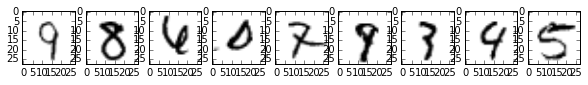

In [71]:
def P5():

### STUDENT START ###
    nn_model = KNeighborsClassifier(n_neighbors=1)
    nn_model.fit(mini_train_data, mini_train_labels)
    dev_predictions = nn_model.predict(dev_data)
    print classification_report(dev_labels, dev_predictions, 
                                target_names=['0','1','2','3','4','5','6','7','8','9'])  
    cm = confusion_matrix(dev_labels, dev_predictions)
    print "Confusion Matrix for 1-NN: Expected vs. Predicted"
    print cm
    dev_results_incorrect = (dev_predictions != dev_labels)
    dev_data_incorrect = dev_data[dev_results_incorrect]
    dev_predictions_incorrect = dev_predictions[dev_results_incorrect]
    dev_labels_incorrect = dev_labels[dev_results_incorrect]
    
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        print "Predicted:", dev_predictions_incorrect[i], "Actually:", dev_labels_incorrect[i]
        plt.subplot(1,9,i+1)
        plt.imshow(dev_data_incorrect[i].reshape((28,28)), cmap=plt.cm.binary)
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

In [25]:
def P6():
    
### STUDENT START ###
    # function to preprocess data, blurs data points by averaging neighbors in a 28x28 grid
    def blur_pixels(array):
        blurred = []
        for pixel in array:
            if pixel < 28: # skip the first row so we aren't blurring based on last row
                blurred.append(pixel)
            elif pixel > 756: # skip the last row so we aren't blurring based on first row
                blurred.append(pixel)
            else:
                try:
                    blurred.append(np.mean([array[pixel-29], array[pixel-28], array[pixel-27],
                                            array[pixel-1], array[pixel], array[pixel+1],
                                            array[pixel+27], array[pixel+28], array[pixel+29]]))
                except:
                    blurred.append(pixel)
        return blurred
    
    # preprocess the mini_train_data
    # start by making a numpy copy just we don't overwrite the training set
    mini_copy = mini_train_data.copy()
    mini_train_blurred = []
    for item in mini_copy:
        mini_train_blurred.append(blur_pixels(item))
    mini_train_blurred = np.array(mini_train_blurred)
    
    # preprocess the dev_data
    # start by making a numpy copy just we don't overwrite the training set
    dev_copy = dev_data.copy()
    dev_data_blurred = []
    for item in dev_copy:
        dev_data_blurred.append(blur_pixels(item))
    dev_data_blurred = np.array(dev_data_blurred)
    
    # fit models to blurred and unblurred versions of data 
    nn_model = KNeighborsClassifier(n_neighbors=1)
    nn_model.fit(mini_train_data, mini_train_labels)
    print 'Unblurred:', nn_model.score(dev_data, dev_labels)
    
    nn_model2 = KNeighborsClassifier(n_neighbors=1)
    nn_model2.fit(mini_train_blurred, mini_train_labels)
    print 'mini_train_data blurred, dev_data unblurred:', nn_model2.score(dev_data, dev_labels)
    
    nn_model3 = KNeighborsClassifier(n_neighbors=1)
    nn_model3.fit(mini_train_data, mini_train_labels)
    print 'mini_train_data, but dev_data blurred:', nn_model3.score(dev_data_blurred, dev_labels)
    
    nn_model4 = KNeighborsClassifier(n_neighbors=1)
    nn_model4.fit(mini_train_blurred, mini_train_labels)
    print 'mini_train_data blurred and dev_data blurred:', nn_model4.score(dev_data_blurred, dev_labels)
    
### STUDENT END ###

P6()

Unblurred: 0.892
mini_train_data blurred, dev_data unblurred: 0.892
mini_train_data, but dev_data blurred: 0.892
mini_train_data blurred and dev_data blurred: 0.892


ANSWER: I did not find any difference in blurring the digits. In fact, using a logical test, it looks like my blurring function resulted in only changing the pixels of about 1/3 of of the examples in the mini_train_data. Looking at the values, this could be due to most pixels being equal to 0. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [8]:
def P7():

### STUDENT START ###
    bnb_model = BernoulliNB(alpha=1.0, binarize=0.333)
    bnb_model.fit(mini_train_data, mini_train_labels)
    print 'BernoulliNB with binarize=0.333 had accuracy of:'
    print bnb_model.score(dev_data, dev_labels)
    
    # preprocess data to convert to 0=white, 1=grey, 2=black
    mini_copy = mini_train_data.copy()
    mini_copy[mini_copy < 0.35] = 0
    mini_copy[np.logical_and(mini_copy >= 0.35, mini_copy <= 0.65)] = 1
    mini_copy[mini_copy > 0.65] = 2
    # now train multinomial classified on mini_copy
    mnb_model = MultinomialNB(alpha=1.0)
    mnb_model.fit(mini_copy, mini_train_labels)
    print 'MultinomialNB with white<0.35, grey between 0.35 and 0.65, black > 0.65'
    print 'had accuracy of:'
    print mnb_model.score(dev_data, dev_labels)
    
### STUDENT END ###

P7()

BernoulliNB with binarize=0.333 had accuracy of:
0.819
MultinomialNB with white<0.35, grey between 0.35 and 0.65, black > 0.65
had accuracy of:
0.797


ANSWER: With the values I chose to classify the pixels as white, grey or black -- < 0.35, between 0.35 and 0.65, and > 0.65, respectively -- I found the multiclass model actual had worse results. I expect the binary class model did better because it increased the probablity of where there should have been data in that pixel. With the multiclass model, the 'grey' values are less likely to be interpreted as 'on'.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [23]:
def P8(alphas):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.333)
    grid = GridSearchCV(estimator=bnb_model, param_grid=alphas)
    grid.fit(mini_train_data, mini_train_labels)
    print grid
    print grid.grid_scores_
    print grid.best_score_
    print grid.best_estimator_.alpha
    print grid.best_params_
    return grid

    
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

GridSearchCV(cv=None,
       estimator=BernoulliNB(alpha=1.0, binarize=0.333, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)
[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001}, mean: 0.82500, std: 0.01531, params: {'alpha': 0.001}, mean: 0.82600, std: 0.01438, params: {'alpha': 0.01}, mean: 0.82200, std: 0.01835, params: {'alpha': 0.1}, mean: 0.81500, std: 0.01230, params: {'alpha': 0.5}, mean: 0.81300, std: 0.01455, params: {'alpha': 1.0}, mean: 0.79900, std: 0.01363, params: {'alpha': 2.0}, mean: 0.76100, std: 0.01037, params: {'alpha': 10.0}]
0.826
0.01
{'alpha': 0.01}


In [19]:
print nb.best_params_

{'alpha': 0.01}


ANSWER: The best score occurred with alpha=0.01. The accuracy when alpha=0 was 0.092. It does make sense that alpha=0 would not generalize well because it is saying that if the training set had no examples with pixels that matched the test value, then the probability would be 0%. The other values of alpha allow for some flexibility in prior probability to predict on unseen data. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

GaussianNB accuracy, default params: 0.666
The mean theta value: 0.129412729766
The shape of the theta array: (10, 784)
The mean sigma value: 0.0523451876537
The shape of the sigma array: (10, 784)
GaussianNB accuracy for sigma_=np.mean(sigma_): 0.793


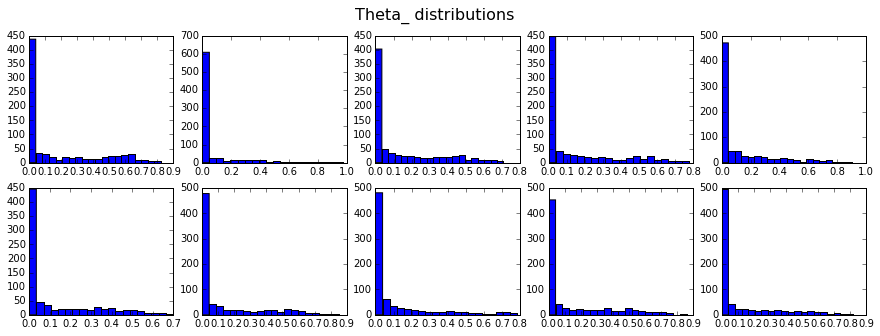

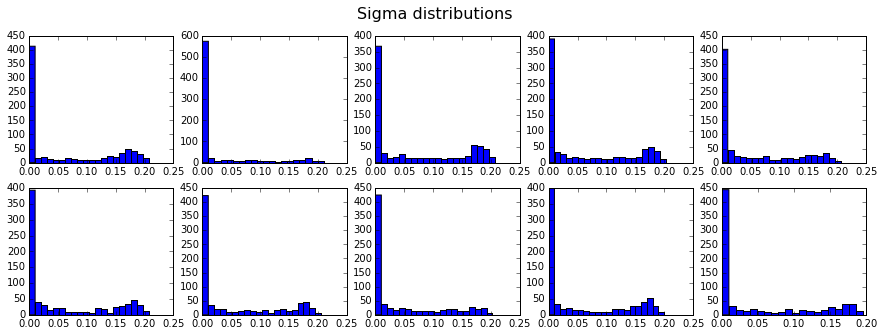

In [55]:
def P9():

### STUDENT END ###
    gnb_model_1 = GaussianNB()
    gnb_model_1.fit(mini_train_data, mini_train_labels)
    print 'GaussianNB accuracy, default params:', gnb_model_1.score(dev_data, dev_labels)
    print 'The mean theta value:', np.mean(gnb_model_1.theta_)
    print 'The shape of the theta array:', gnb_model_1.theta_.shape
    print 'The mean sigma value:', np.mean(gnb_model_1.sigma_)
    print 'The shape of the sigma array:', gnb_model_1.sigma_.shape

    # plot the theta and sigma values each digit
    fig1 = plt.figure(figsize=(15,5))
    fig1.suptitle('Theta_ distributions', fontsize=16)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.hist(gnb_model_1.theta_[i-1], bins=20)
        
    fig2 = plt.figure(figsize=(15,5))
    fig2.suptitle('Sigma distributions', fontsize=16)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.hist(gnb_model_1.sigma_[i-1], bins=20)
  
    
    # try again with mean sigma
    gnb_model_2 = GaussianNB()
    gnb_model_2.fit(mini_train_data, mini_train_labels)
    gnb_model_2.sigma_ += np.mean(gnb_model_2.sigma_)
    print 'GaussianNB accuracy for sigma_=np.mean(sigma_):', gnb_model_2.score(dev_data, dev_labels)
    
### STUDENT END ###

gnb = P9()

ANSWER: The GaussianNB model predicted 0.666 accuracy on the dev_data without any changes. By adding some additional variance to the GaussianNB model, in my case I added the mean sigma to each sigma value, the accuracy increases to about the same level as the other NB models. When the variance of each pixel was set to 0, the GaussianNB model was likely to predict 0. By moving the variance of each pixel a little bit away from zero, the model improved accuracy by allowing some flexibility in predicting unseen data.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

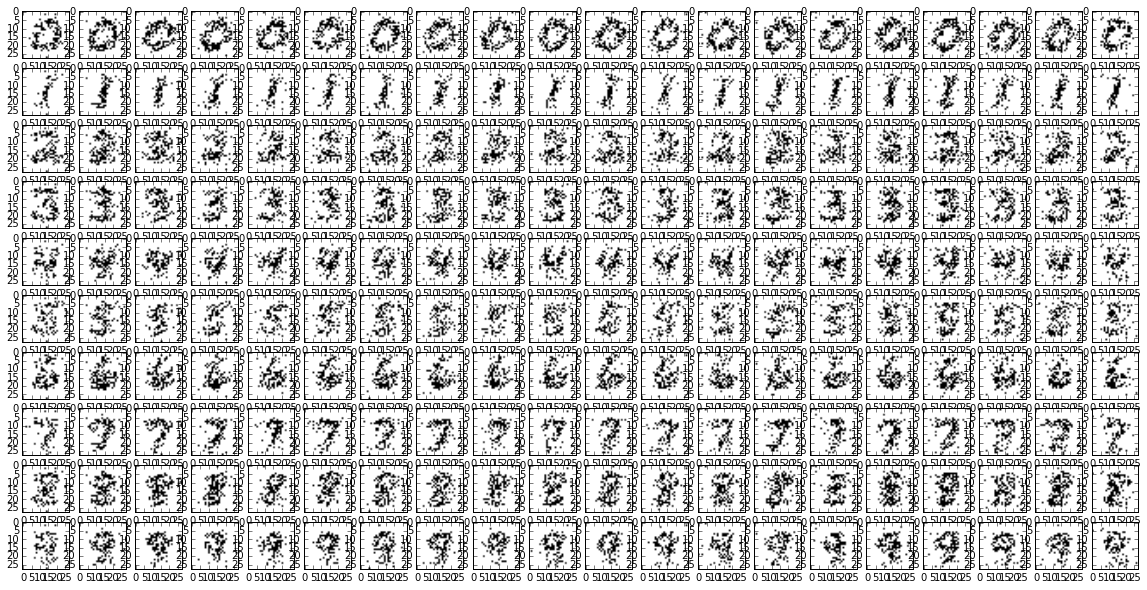

In [64]:
def P10(num_examples):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(bnb_model.feature_log_prob_)
    
    # generate 20 random 'digits', which are 784 features
    rand_digits = np.random.rand(20,784)
    
    #start creating 20 examples of each digit
    zeroes = np.copy(rand_digits)
    # first assign all pixels whose probability is greater than its value to 1 (turn on)
    zeroes[zeroes <= probs[0]] = 1
    # then set all other pixels to 0 (turn off)
    zeroes[zeroes != 1] = 0
    # repeat for other digits
    ones = np.copy(rand_digits)
    ones[ones <= probs[1]] = 1
    ones[ones != 1] = 0
    twos = np.copy(rand_digits)
    twos[twos <= probs[2]] = 1
    twos[twos != 1] = 0
    threes = np.copy(rand_digits)
    threes[threes <= probs[3]] = 1
    threes[threes != 1] = 0
    fours = np.copy(rand_digits)
    fours[fours <= probs[4]] = 1
    fours[fours != 1] = 0
    fives = np.copy(rand_digits)
    fives[fives <= probs[5]] = 1
    fives[fives != 1] = 0
    sixes = np.copy(rand_digits)
    sixes[sixes <= probs[6]] = 1
    sixes[sixes != 1] = 0
    sevens = np.copy(rand_digits)
    sevens[sevens <= probs[7]] = 1
    sevens[sevens != 1] = 0
    eights = np.copy(rand_digits)
    eights[eights <= probs[8]] = 1
    eights[eights != 1] = 0
    nines = np.copy(rand_digits)
    nines[nines <= probs[9]] = 1
    nines[nines != 1] = 0
    
    # now bring all our examples together
    digits = np.concatenate((zeroes, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
    
    #then move to plot 20 of each digit
    fig = plt.figure(figsize=(20,10))
    for i in range(1,201):
        plt.subplot(10,20,i)
        plt.imshow(digits[i-1].reshape((28,28)), cmap=plt.cm.binary)
    
### STUDENT END ###

P10(20)

ANSWER: The generated digits are much more blurry than the training digits, but still usually recognizable. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [111]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb_model = BernoulliNB(alpha=0.01, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    
    # find the max post probability for each digit
    max_post_probs = np.amax(bnb_model.predict_proba(dev_data), axis=1)
    # assign each of those max probabilities to a bin in buckets
    bucket_digitize = np.digitize(max_post_probs, buckets)
    # fill bins with the counts of each probabilities
    # np.digitize starts bins at 1, not 0, so we have to offset to get it right 
    for i in bucket_digitize:
        try:
            total[i] += 1
        except:
            total[-1] += 1
    
    # find what digit the max post probability predicted
    max_post_probs_digit = np.argmax(bnb_model.predict_proba(dev_data), axis=1)
    # did the max post probability match the dev label?
    correct_predictions = max_post_probs_digit == dev_labels
    # create an array of just the max post probabilities that were correct
    correct_max_probs = correct_predictions * max_post_probs
    # assign those correct post probabilities to a bin in buckets
    correct_digitize = np.digitize(correct_max_probs, buckets)
    for i in correct_digitize:
        try:
            correct[i] += 1
        except:
            correct[-1] += 1
    
    #plt.plot(buckets, accuracy)
    
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  37    accuracy = 0.378
p(pred) <= 0.9990000000000    total =  93    accuracy = 0.441
p(pred) <= 0.9999900000000    total =  64    accuracy = 0.578
p(pred) <= 0.9999999000000    total =  62    accuracy = 0.613
p(pred) <= 0.9999999990000    total =  69    accuracy = 0.681
p(pred) <= 0.9999999999900    total =  69    accuracy = 0.899
p(pred) <= 0.9999999999999    total =  55    accuracy = 0.891
p(pred) <= 1.0000000000000    total = 551    accuracy = 0.976


ANSWER: The Naive Bayes classifier is weakly calibrated. Specifically, the NB classifier is biased towards really high posterior probabilities. For example, the posterior probability of 0.9 should be 90% accurate but was only 37.8% accurate in the NB model. However, the higher the posterior probability, the higher the accuarcy of the NB classifier, so their is a positive correlation between posterior probability and accuracy. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

In [122]:
def P12():

### STUDENT START ###
    bnb_model = BernoulliNB(alpha=0.001, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    print 'starting point:', bnb_model.score(dev_data, dev_labels)
     
    # add feature that splits digit into 3 parts - top, middle, bottom
    # and then adds the sum of each region as new data points to the digit
    def split_into_3(array):
        top = np.sum(array[0:len(array)/3])
        middle = np.sum(array[len(array)/3:2*len(array)/3])
        bottom = np.sum(array[2*len(array)/3:])
        new_array = np.concatenate((array, [top, middle, bottom]))

    # create copy of mini_train_data to try on
    train_copy = np.copy(mini_train_data)

    '''
    I ran out of time and was not able to implement this or any other features.
    '''
    
    #refit model with train_copy
    bnb_model2 = BernoulliNB(alpha=0.001, binarize=0.5)
    bnb_model2.fit(train_copy, mini_train_labels)
    print 'with split parts feature:', bnb_model2.score(dev_data, dev_labels)
    

### STUDENT END ###

P12()

starting point: 0.831
with split parts feature: 0.831
